In [19]:
import pandas as pd
invoice_df = pd.read_csv('fct_invoice.csv')
customer_df = pd.read_json('dim_customer.json')

customer_df['id'].nunique()

5191

Easy 1

In [11]:
print(invoice_df['category'].unique())
print(invoice_df['category'].nunique())

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
8


Easy 2

In [12]:
print(invoice_df['payment_method'].value_counts().idxmax())
print(invoice_df['payment_method'].value_counts().max())

Cash
44447


Easy 3

In [13]:
# make a new column for total sales
invoice_df['total_sales'] = invoice_df['price'] * invoice_df['quantity']
invoice_df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,total_sales
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40
...,...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,293.25
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,20.92
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,20.92
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,16800.00


In [14]:
category_total = invoice_df.groupby('category')['total_sales'].sum() #total of each category
category_total.sort_values(ascending=False).head(3)

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total_sales, dtype: float64

Medium 1

In [15]:
over_45_customers = customer_df[(customer_df['age'] > 45)] # a filtered dataframe with rows of customers over 45
over_45_id = over_45_customers['id'] # a filtered series (not a dataframe) with ids of customers over 45
updated_df = invoice_df[invoice_df['customer_id'].isin(over_45_id)] 
print(updated_df['total_sales'].sum())

82039768.15


Medium 2

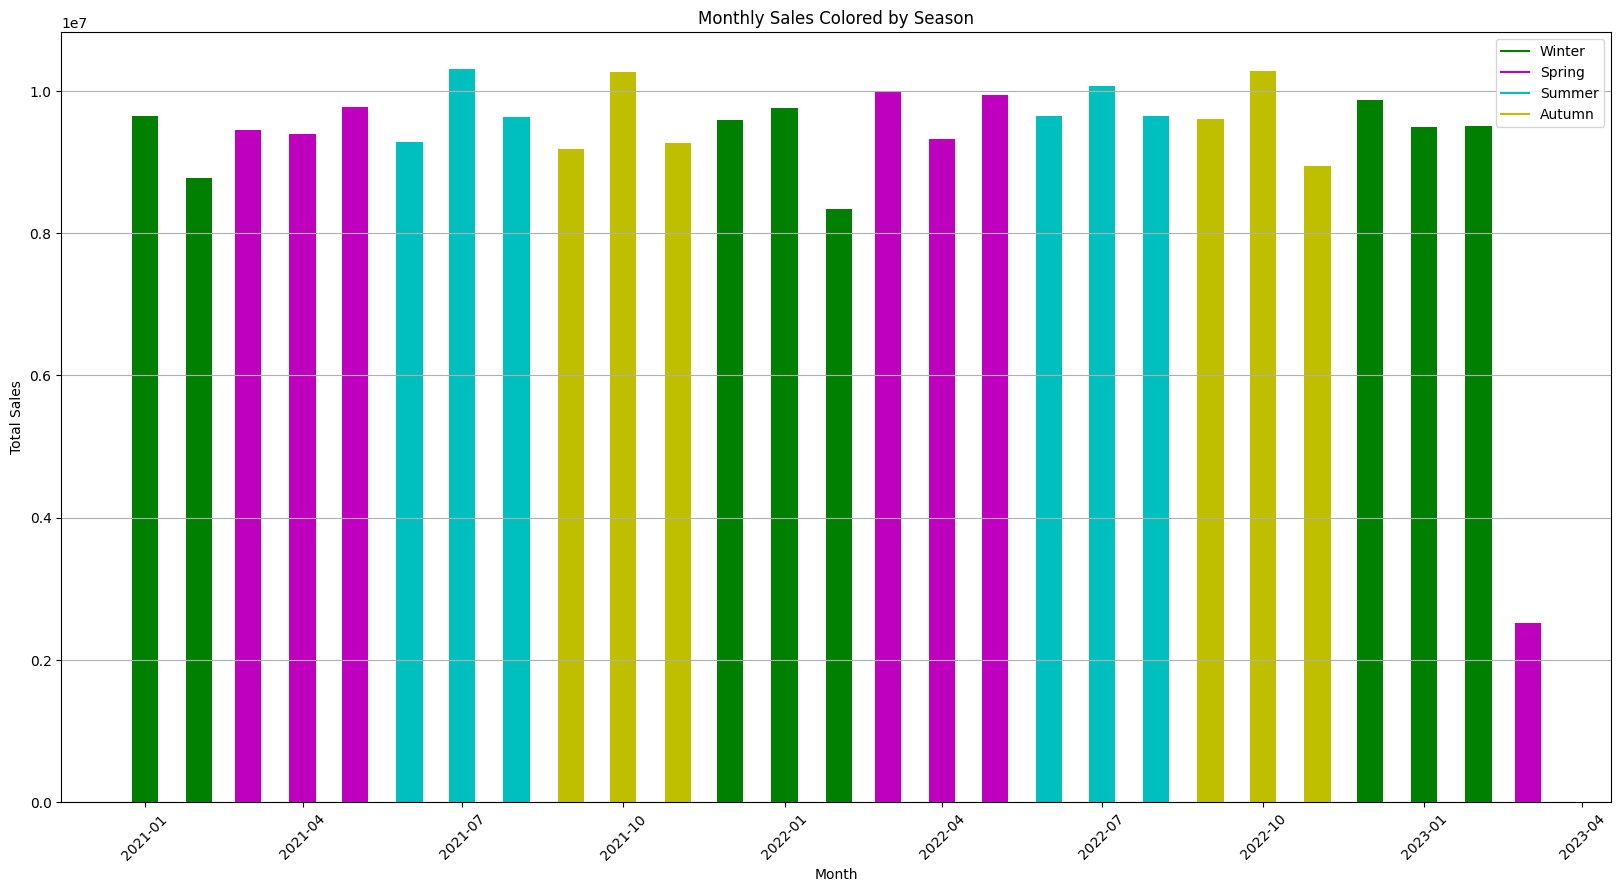

In [16]:
import matplotlib.pyplot as plt

invoice_df['invoice_date'] = pd.to_datetime(invoice_df['invoice_date'], dayfirst=True) #convert

# group by month
invoice_df['month'] = invoice_df['invoice_date'].dt.to_period('M')
monthly_sales = invoice_df.groupby('month')['total_sales'].sum() 

x = monthly_sales.index.to_timestamp()
y = monthly_sales.values

# assign colors to each month based on its season
def get_season_color(month_date):
    month_number = month_date.month
    if month_number in [12, 1, 2]:
        return 'g'
    elif month_number in [3, 4, 5]:
        return 'm'
    elif month_number in [6, 7, 8]:
        return 'c'
    else:
        return 'y'

color_list = []  
for month_date in x:
    color = get_season_color(month_date)  
    color_list.append(color)  

# plot the bar chart
plt.figure(figsize=(20, 10))
plt.bar(x, y, color=color_list, width=15)
plt.title("Monthly Sales Colored by Season")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.plot([], [], color='g', label='Winter')
plt.plot([], [], color='m', label='Spring')
plt.plot([], [], color='c', label='Summer')
plt.plot([], [], color='y', label='Autumn')
plt.legend()

plt.show()

Medium 3
The data has been consistent, showing no significant highs or lows. Looking at the seasonal patterns, autumn has the most sales, with sales exceeding 1.0e7 or 10 million. On the other hand, winter has the least sales, with sales below 10 million.

In [24]:
merged_df = pd.merge(invoice_df, customer_df, left_on='customer_id', right_on='id')
merged_df['total_sales'] = merged_df['quantity'] * merged_df['price']

age_group_list = []

for age in merged_df['age']:
    if pd.isnull(age):
        age_group_list.append('Unknown')
    elif age <= 19:
        age_group_list.append('10-19')
    elif age <= 29:
        age_group_list.append('20-29')
    elif age <= 39:
        age_group_list.append('30-39')
    elif age <= 49:
        age_group_list.append('40-49')
    elif age <= 59:
        age_group_list.append('50-59')
    elif age <= 69:
        age_group_list.append('60-69')
    elif age <= 79:
        age_group_list.append('70-79') 
    else:
        age_group_list.append('80-89')

merged_df['age_group'] = age_group_list

pd.set_option('display.max_rows', None)
pivot = pd.pivot_table(
    merged_df,
    values='total_sales',
    index=['category', 'age_group'],
    aggfunc='sum'
)
pivot

total_sales
category        age_group             
Books           10-19         12801.75
                20-29         79461.75
                30-39         84143.10
                40-49         87203.40
                50-59         74962.20
                60-69         80476.80
                70-79         54827.85
                80-89         26664.00
                Unknown      334012.05
Clothing        10-19       1927413.84
                20-29      10250732.80
                30-39      11354126.96
                40-49      11215189.92
                50-59      10321851.76
                60-69      10660642.08
                70-79       7769371.28
                80-89       4493698.00
                Unknown    46003764.40
Cosmetics       10-19        109619.36
                20-29        605915.32
                30-39        723544.70
                40-49        665034.96
                50-59        587780.96
                60-69        649990.76
                70-79        419082.62
                80-89        254531.60
                Unknown     2777362.62
Food & Beverage 10-19         13582.31
                20-29         73491.96
                30-39         87246.86
                40-49         89553.29
                50-59         72425.04
                60-69         80976.09
                70-79         55050.98
                80-89         31332.93
                Unknown      345875.59
Shoes           10-19        993281.35
                20-29       5924878.24
                30-39       7200839.66
                40-49       7025590.02
                50-59       5852857.84
                60-69       5978893.54
                70-79       4480269.05
                80-89       2628744.60
                Unknown    26468097.17
Souvenir        10-19         12375.15
                20-29         54943.32
                30-39         64092.72
                40-49         66391.80
                50-59         54943.32
                60-69         55025.43
                70-79         38673.81
                80-89         23718.06
                Unknown      265661.04
Technology      10-19       1129800.00
                20-29       5261550.00
                30-39       6159300.00
                40-49       5954550.00
                50-59       4435200.00
                60-69       5471550.00
                70-79       3638250.00
                80-89       1946700.00
                Unknown    23865450.00
Toys            10-19         60426.24
                20-29        385100.80
                30-39        420582.40
                40-49        390906.88
                50-59        345067.52
                60-69        363955.20
                70-79        273244.16
                80-89        153932.80
                Unknown     1587210.24

Hard 1